   #                                       Customer Personality Analysis
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a
business to better understand its customers and makes it easier for them to modify products
according to the specific needs, behaviors and concerns of different types of customers.
Customer personality analysis helps a business to modify its product based on its target customers
from different types of customer segments. For example, instead of spending money to market a
new product to every customer in the company’s database, a company can analyze which customer
segment is most likely to buy the product and then market the product only on that particular
segment.



# 
Here we are executing an unsupervised clustering of data on the customer records. Customer segmentation is the process of grouping consumers according to characteristics that are shared by all of the customers in a cluster.

# Importing Libraries and Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_excel("marketing_campaign1.xlsx")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [6]:
data.shape

(2240, 29)

In [7]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

# Data Cleaning

In [9]:
#checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# 
Only income has null values

In [10]:
data = data.dropna(subset = ['Income'])

In [11]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
data.shape

(2216, 29)

In [13]:
data.duplicated().sum()

0

# Feature Engineering

In [14]:
print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [15]:
#Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
data['Age'] = 2014 - data['Year_Birth']

In [16]:
#Create another feature "Spent" indicating the total amount spent by the customer
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
     

In [17]:
#Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

In [18]:
#Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
data['Children'] = data['Kidhome'] + data['Teenhome']

In [19]:
#To get further clarity of household, Creating feature indicating "Family_Size"
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']

In [20]:
#Create a feature "Is_Parent" to indicate parenthood status
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

In [21]:
#Create a feature "Total_Acc_Cmp" to indicate the total campaigns accepted by the customer
data['Total_Acc_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

In [22]:
#Segmenting education levels in three groups
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})
     

In [23]:
#Dropping some of the redundant features
to_drop = ['Marital_Status', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(to_drop, axis=1)
     

In [24]:
data.head(5)

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Total_Acc_Cmp
0,Graduate,58138.0,0,0,2012-09-04,58,635,88,546,172,...,10,4,7,57,1617,Alone,0,1,0,1
1,Graduate,46344.0,1,1,2014-03-08,38,11,1,6,2,...,1,2,5,60,27,Alone,2,3,1,0
2,Graduate,71613.0,0,0,2013-08-21,26,426,49,127,111,...,2,10,4,49,776,Partner,0,2,0,0
3,Graduate,26646.0,1,0,2014-02-10,26,11,4,20,10,...,0,4,6,30,53,Partner,1,3,1,0
4,Postgraduate,58293.0,1,0,2014-01-19,94,173,43,118,46,...,3,6,5,33,422,Partner,1,3,1,0


# Data Analysis and Visualization


In [25]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Family_Size,Is_Parent,Total_Acc_Cmp
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,4.085289,2.671029,5.800993,5.319043,45.179603,607.075361,0.947202,2.592509,0.714350,0.448556
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,2.740951,2.926734,3.250785,2.425359,11.985554,602.900476,0.749062,0.905722,0.451825,0.892440
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,1.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,2.000000,0.000000,3.000000,3.000000,37.000000,69.000000,0.000000,2.000000,0.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,4.000000,2.000000,5.000000,6.000000,44.000000,396.500000,1.000000,3.000000,1.000000,0.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,6.000000,4.000000,8.000000,7.000000,55.000000,1048.000000,1.000000,3.000000,1.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,27.000000,28.000000,13.000000,20.000000,121.000000,2525.000000,3.000000,5.000000,1.000000,5.000000


Text(0.5, 1.0, 'Age')

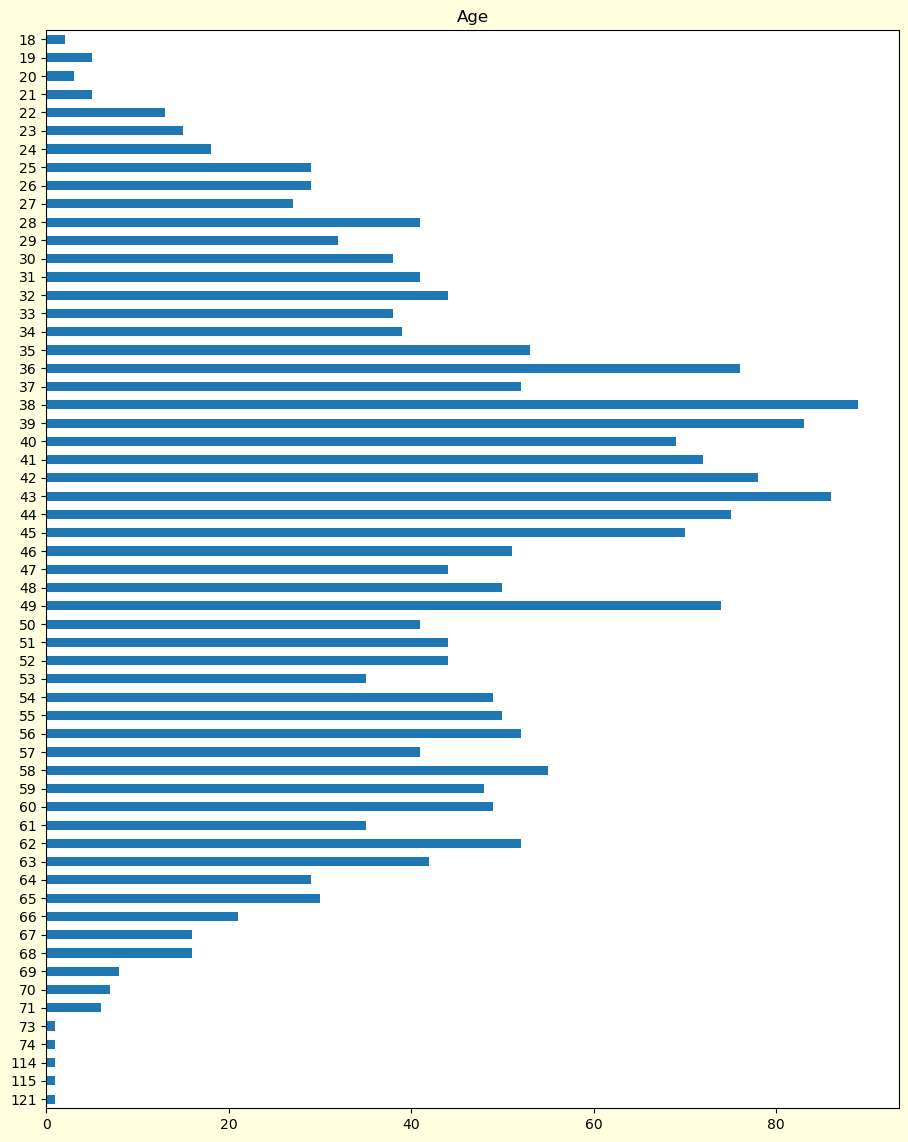

In [26]:
plt.figure(figsize=(11,14), facecolor='lightyellow')
data['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age')

# 
The age graph shows that the majority of customers are between the ages of 37 and 50.
Consumer behavior is influenced by aging,older consumers tend to have different product preferences compared to younger consumers.
What age group is intrested in company, some products are not of interest to certain age groups.

Text(0.5, 1.0, 'Income')

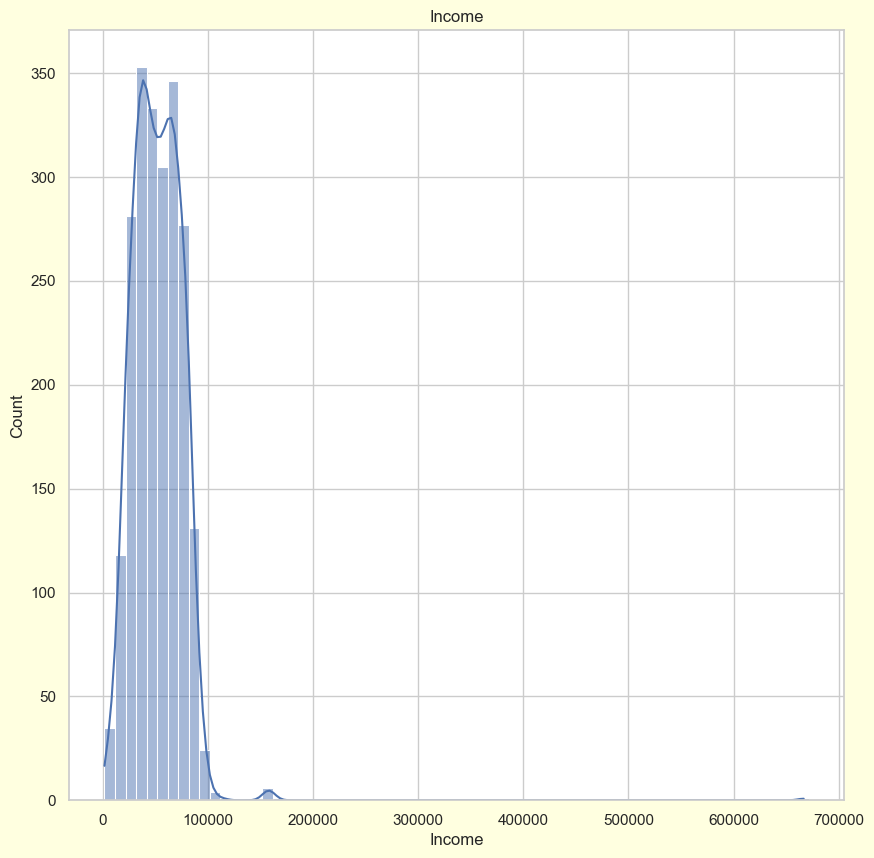

In [27]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.histplot(data=data, x='Income', binwidth=10000, kde=True)
ax.set_title('Income')

# 
The income graph shows that the majority of the customers have incomes between 30000 and 80000.
The  change in the consumption of goods based on income. This means consumers will generally spend more if they experience an increase in income.

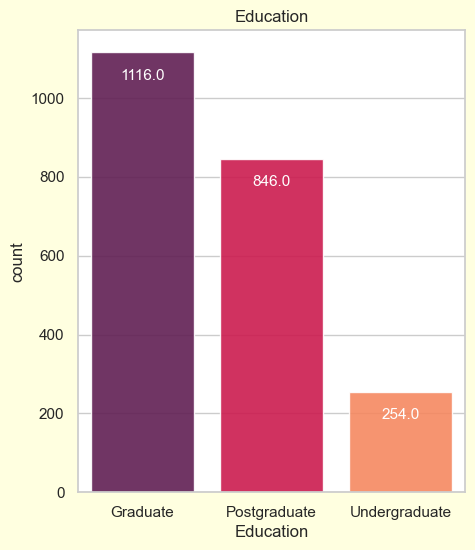

In [28]:
plt.figure(figsize=(5,6), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Education', saturation=1, alpha=0.9, palette='rocket', order=data['Education'].value_counts().index)
ax.set_title('Education')
for p in ax.patches:
 ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
plt.show()

# 
The majority of clients come from graduate-level educational backgrounds, according to the education graph.This will make it easier to analyze and compare the education levels of different customers.Consumers’ level of education plays a significant role in the shaping of marketing strategies.Education levels affect the appeal of product features. Extremely basic product features may not appeal to a highly-educated audience, while complex product features may not appeal to consumers with low to medium levels of education.The level of education will influence lifestyles, buying patterns and behaviours.

Text(0, 5, '786')

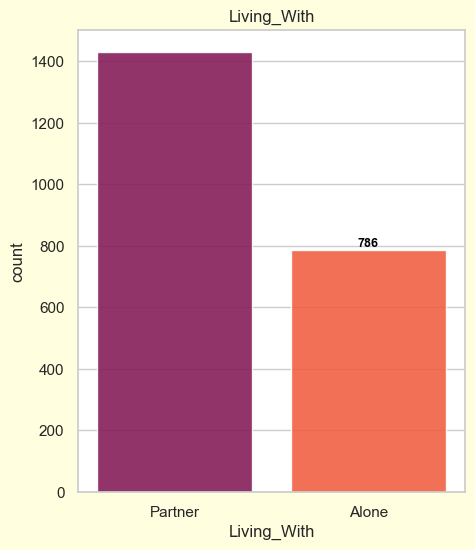

In [29]:
plt.figure(figsize=(5, 6), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Living_With', saturation=1, alpha=0.9, palette='rocket', order=data['Living_With'].value_counts().index)
ax.set_title('Living_With')
for p in ax.patches:
 number = '{}'.format(p.get_height().astype('int64'))
ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=9)

# 
The graph of living with shows that the majority of consumers are living with partner.Being clear on the type of family you are interested in targeting means that you can learn what matters to them; their values, their motivators, their wants and needs. Customers living with partner often have distinctly different purchasing behaviours to single consumers.

Text(-49, 0, '676083')

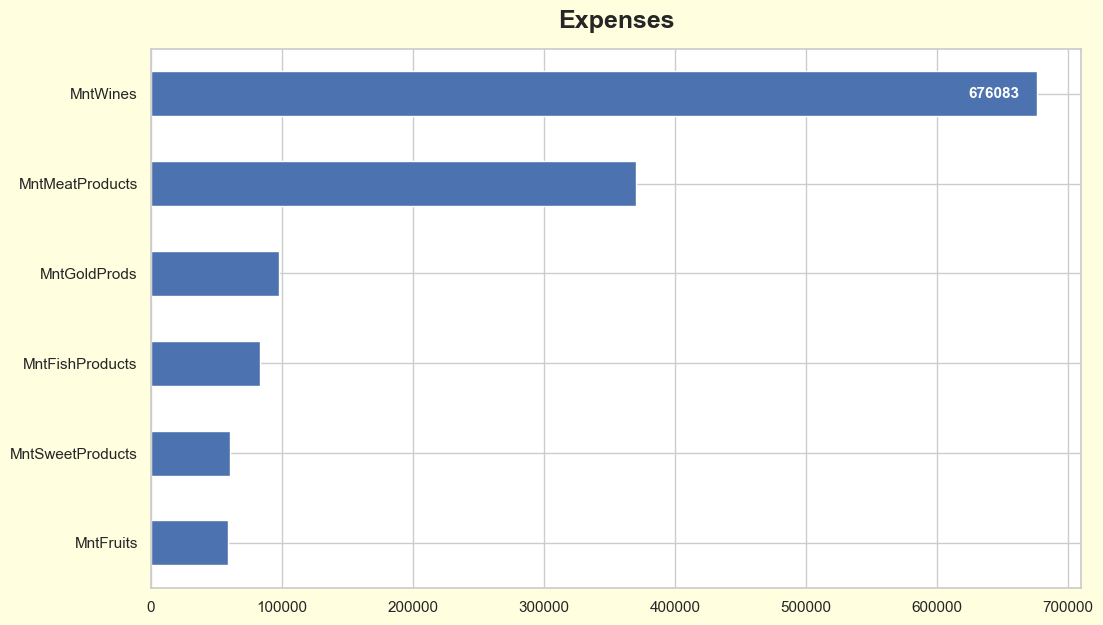

In [30]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
 x_value = rect.get_width()
 y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

# 
Wine has the largest sell amount as seen by the graph of total expenses

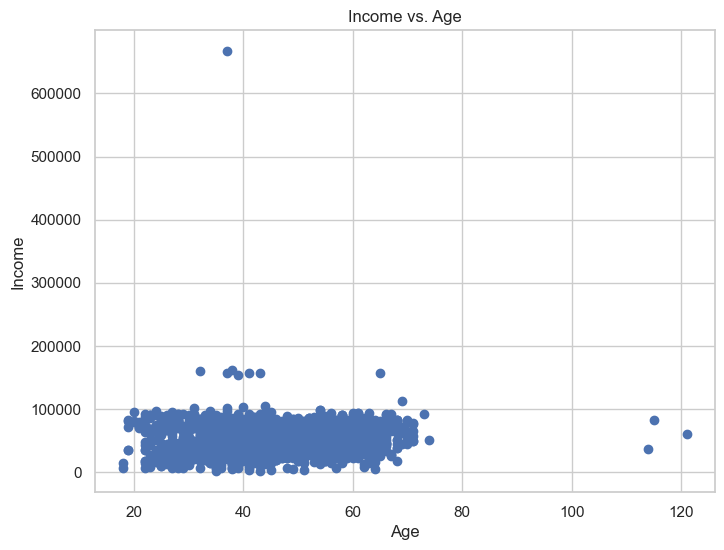

In [33]:
# Objective: Examine the relationship between income and age.
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Income'])
plt.title("Income vs. Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

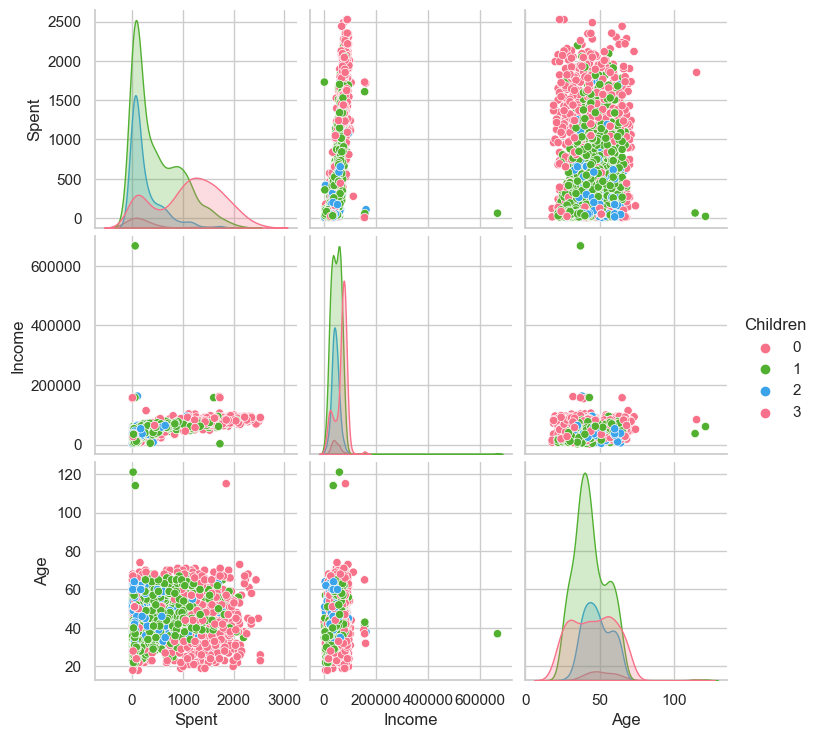

In [38]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

<Axes: >

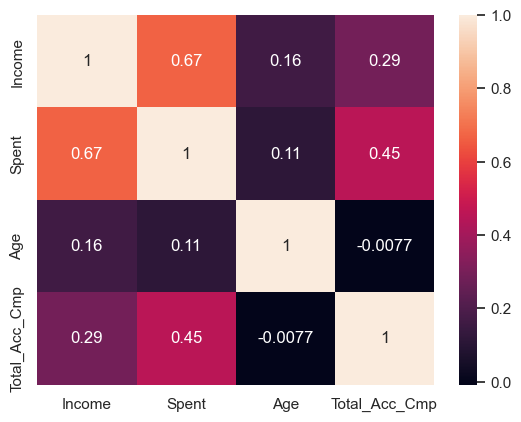

In [27]:
sns.heatmap(data[['Income', 'Spent','Age', 'Total_Acc_Cmp']].corr(), annot=True)

# 
It helps to show relationships between two variables, one plotted on each axis. Income and spent  have the strongest link, followed by spent and the total number of campaigns that were accepted.

# Outlier Detection

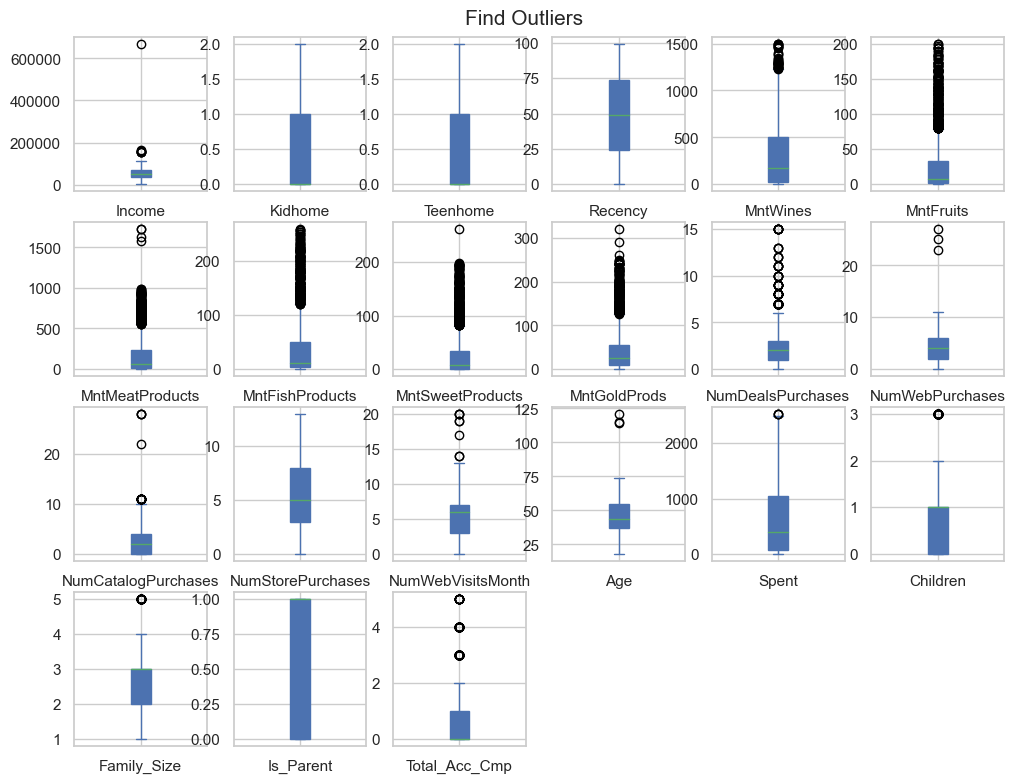

In [39]:
data.plot(subplots=True, layout=(6,6), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

# 
There are many columns having outliers, but most of them seem like natural outliers came from population, whereas the outliers in Age seems like entry errors since it's impossible that people who was born before 1900 still alive. 
The outliers in age and income may have a negative impact on the accuracy of our analysis, so  will remove it.

In [40]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"] < 90)]
data = data[(data["Income"] < 600000)]


In [41]:
len(data)

2212

# Preprocessing

In [42]:
#Categorical Variables Encoding


In [43]:
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [44]:
data['Living_With'] = data['Living_With'].map({'Alone':0,'Partner':1})

In [45]:
data.head()

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Total_Acc_Cmp
0,1,58138.0,0,0,2012-09-04,58,635,88,546,172,...,10,4,7,57,1617,0,0,1,0,1
1,1,46344.0,1,1,2014-03-08,38,11,1,6,2,...,1,2,5,60,27,0,2,3,1,0
2,1,71613.0,0,0,2013-08-21,26,426,49,127,111,...,2,10,4,49,776,1,0,2,0,0
3,1,26646.0,1,0,2014-02-10,26,11,4,20,10,...,0,4,6,30,53,1,1,3,1,0
4,2,58293.0,1,0,2014-01-19,94,173,43,118,46,...,3,6,5,33,422,1,1,3,1,0
